# Q2. Perform clustering for the crime data and identify the number of clusters formed and draw inferences. Refer to crime_data.csv dataset.

Data: The data used for this analysis contains information on 50 records of different types of crimes.

### Business Problem:
Objective: To segment the data based on the type of the crime that took place more number of times.

Constraints: Drawing the inferences from the clusters obtained.

Data Preprocessing:
1. Import crime dataset
2. Know the summary of the dataset
3. NA values - no
4. Duplicated values - no
5. Outliers - present in 'rape' column only
6. IQR Technique is used to remove outliers
7. Exclude the state column which is not necessary for analysis 
8. Normalize the data inorder to keep the data in same range

Analysis:
1. Plot the Dendrogram: A dendrogram shows the hierarchial relationship between objects. It is used along with the output of hierarchial clustering for better interpretability
2. Apply AgglomerativeClustering, and choose 3 clusters based on the dendrogram
3. Create a new column as 'clust' which will be our target feature


In [1]:
# import required libraries
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# Load the dataset using pandas
crime = pd.read_csv("crime_data.csv")

In [3]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
crime.isna().sum() # no na values

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [6]:
duplicate = crime.duplicated() # no duplicate values
duplicate
sum(duplicate)

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Murder'>

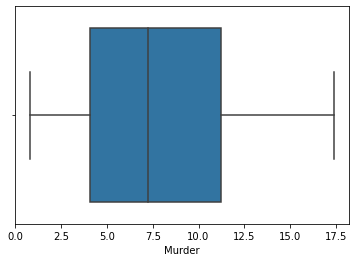

In [8]:
sns.boxplot(crime.Murder) # no outliers


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Assault'>

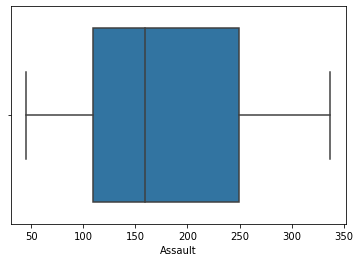

In [9]:
sns.boxplot(crime.Assault) # no outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='UrbanPop'>

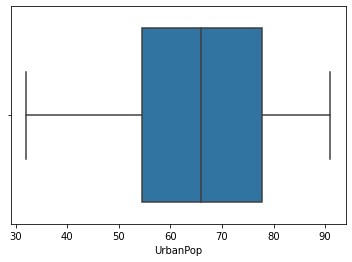

In [10]:
sns.boxplot(crime.UrbanPop) # no outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rape'>

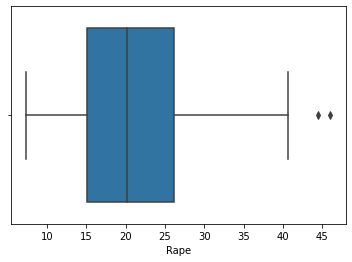

In [11]:
sns.boxplot(crime.Rape) # outliers present

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rape'>

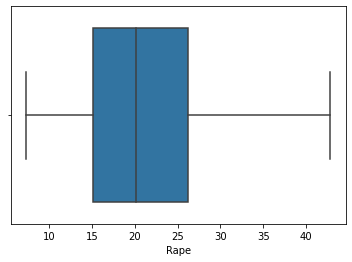

In [12]:
# Imputation
IQR = crime['Rape'].quantile(0.75) - crime['Rape'].quantile(0.25)
lower_limit = crime['Rape'].quantile(0.25) - (IQR * 1.5)
upper_limit = crime['Rape'].quantile(0.75) + (IQR * 1.5)
crime['Rape'] = np.where(crime['Rape'] >= upper_limit, upper_limit, crime['Rape'])
sns.boxplot(crime.Rape)

In [13]:
crime1 = crime.drop(crime.columns[0],axis=1) # remove first column

In [14]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())	/ (i.max()-i.min())
    return (x)

In [15]:
# Normalized data frame (consider only the numerical part of data)
crime_norm = norm_func(crime1.iloc[:, 0:])
crime_norm.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.389444
std,0.262380,0.285403,0.245335,0.256732
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.218860
50%,0.388554,0.390411,0.576271,0.360310
75%,0.629518,0.698630,0.775424,0.531316
max,1.000000,1.000000,1.000000,1.000000


In [16]:
# create dendrogram 
import scipy.cluster.hierarchy as sch 

In [17]:
z = sch.linkage(crime_norm, method = "complete", metric = "euclidean")

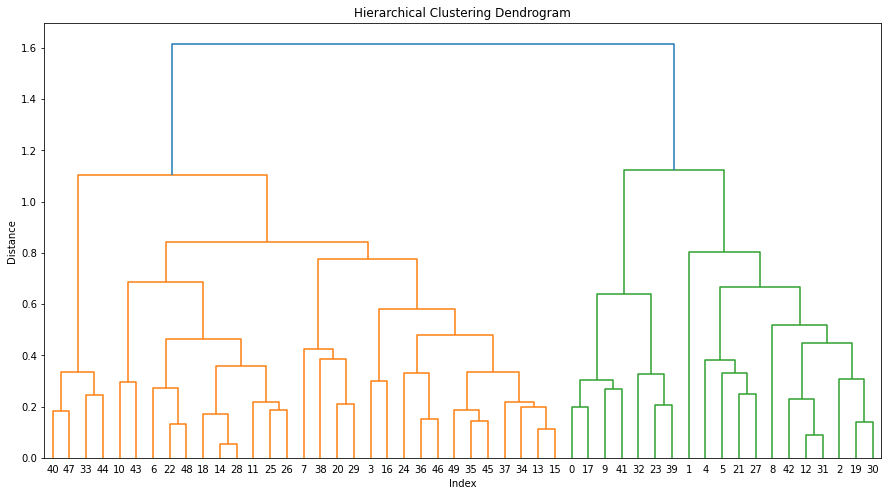

In [18]:
# Dendrogram
plt.figure(figsize = (15, 8)); plt.title('Hierarchical Clustering Dendrogram'); plt.xlabel('Index'); plt.ylabel('Distance')
sch.dendrogram(z, 
    leaf_rotation = 0,  # rotates the x-axis labels
    leaf_font_size = 10 # font size for the x-axis labels
)
plt.show()

1. Cut the Dendrogram into 3 clusters
2. We considered the figure size as x = 15, y = 8
3. Where xlabel = 'index' and ylabel = 'distance'

In [19]:
# Now apply AgglomerativeClustering, and choose 3 clusters based the above dendrogram
from sklearn.cluster import AgglomerativeClustering

In [20]:
h_complete = AgglomerativeClustering(n_clusters = 3, linkage = 'complete', affinity = "euclidean").fit(crime_norm) 
h_complete.labels_

array([2, 1, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1,
       0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [25]:
cluster_labels = pd.Series(h_complete.labels_)

In [28]:
crime1['clust'] = cluster_labels # create a new column and assign the cluster labels to the new column
crime1['clust']

0     2
1     1
2     1
3     0
4     1
5     1
6     0
7     0
8     1
9     2
10    0
11    0
12    1
13    0
14    0
15    0
16    0
17    2
18    0
19    1
20    0
21    1
22    0
23    2
24    0
25    0
26    0
27    1
28    0
29    0
30    1
31    1
32    2
33    0
34    0
35    0
36    0
37    0
38    0
39    2
40    0
41    2
42    1
43    0
44    0
45    0
46    0
47    0
48    0
49    0
Name: clust, dtype: int64

In [23]:
crime = crime1.iloc[:, [3, 0, 1, 2]]
crime.head()

,Rape,Murder,Assault,UrbanPop
0,21.200,13.2,236,58
1,42.825,10.0,263,48
2,31.000,8.1,294,80
3,19.500,8.8,190,50
4,40.600,9.0,276,91


In [30]:
# Aggregate mean of each cluster
crime.iloc[:, 0:].groupby(crime1.clust).mean()

,Rape,Murder,Assault,UrbanPop
clust,,,,
0,16.338710,5.003226,116.483871,63.838710
1,33.204167,10.966667,264.000000,76.500000
2,21.685714,14.671429,251.285714,54.285714


# Combine the data values from each cluster into a summary for data analysis using aggregate function

Solution:
There is no significant difference in cluster1 and cluster2 for Assault crime but when compared we find cluster1 having more percentage of assault crimes.